# Snow removal

In [1]:
#Please note that this cell can be ignored if you installed neural_de from pip
import sys
# sys.path.append("..")
import time

### Imports

In [2]:
import cv2

import matplotlib.pyplot as plt
from pathlib import Path
from neural_de.transformations import DeSnowEnhancer

2025-03-07 11:10:50.000283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 11:10:50.146956: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 11:10:50.179927: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 11:10:50.744140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### Image enhancement
**1. Load your corrupted image**

In [3]:
start=time.time()
input_path = Path('../examples/images/corrupted_truck.png')
corrupted_image = cv2.imread(str(input_path))
# Channel reordering 
corrupted_image = corrupted_image[:, :, ::-1]

Text(0.5, 1.0, '(531, 416, 3)')

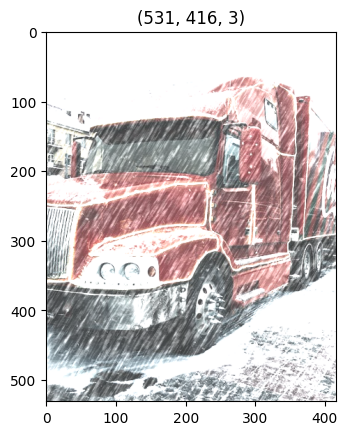

In [4]:
plt.imshow(corrupted_image) 
plt.title(corrupted_image.shape)

**2. Initialize the purifier**
   
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least the first time you launch the library). Once the download is complete you can comment or remove the following cell. The model will be stored locally.

In [5]:
purifier = DeSnowEnhancer()
# batch size = 1
purified_image = purifier.transform([corrupted_image])

[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:41} INFO - Checking model availability...
[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_model_manager.py:58} INFO - Model already available locally, skipping download
[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:56} INFO - Loading model. Using cpu 

[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:50} INFO - Model correctly loaded to cpu
[03-07 11:10:52] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_desnow_enhancer.py:75} INFO - Converting list like

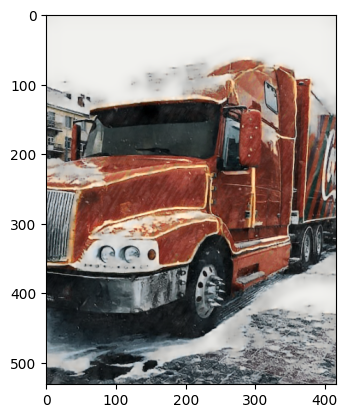

In [6]:
plt.imshow(purified_image[0])

In [7]:
end=time.time()
print("temps final : ",end-start)

temps final :  4.258347511291504
